In [111]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part I
url = 'https://en.wikipedia.org/wiki/FTSE_100_Index'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

table_constituents = soup.find('table', {'id': 'constituents'}).find('tbody')

# Creates dict with ticker as key and industry as value
table = {}
for tr in table_constituents.find_all('tr'):
    tds = tr.find_all('td')
    if len(tds) == 3:
        table[tds[0].text] = [tds[1].text, tds[2].text.replace('\n', '')]


df_scrape = pd.DataFrame.from_dict(table, orient='index',  columns=['Ticker', 'Industry'])

                   Ticker                      Industry
3i                    III            Financial Services
Admiral Group         ADM             Nonlife Insurance
Anglo American plc    AAL                        Mining
Antofagasta          ANTO                        Mining
Ashtead Group         AHT              Support Services
...                   ...                           ...
Unilever             ULVR                Personal Goods
United Utilities      UU.  Gas, Water & Multi-utilities
Vodafone Group        VOD     Mobile Telecommunications
Whitbread             WTB            Retail hospitality
WPP plc               WPP                         Media

[100 rows x 2 columns]


In [106]:
# Part II
import json

api_address = 'https://ies-midterm.soulution.rocks/'
login = {'cuni': '80119387'}

# Logins to website
r2 = requests.post(api_address+'login/', json.dumps(login))

r2_as_json = r2.json()

personal_code = r2_as_json['data']['personal_code']
dataset_ids = r2_as_json['data']['dataset_ids']
dataset_ids = dataset_ids[0]
print(personal_code)

# Gets codes from api_address using GET method 
list_of_data = []
for code in dataset_ids:
    while True:
        r3 = requests.get(f"{api_address}data/{code}")
        if len(r3.json()['data']) > 0:
               list_of_data.append(r3.json()['data'])
               break
    
# Converting list to DataFrame
df = pd.DataFrame(list_of_data)
print(df)

83d852410d
  company                                               data
0     IHG  [{'Date': '2019-01-02', 'Open': '56.8177032470...
1     BHP  [{'Date': '2019-01-02', 'Open': '46.6399993896...
2     NWG  [{'Date': '2019-01-02', 'Open': '5.38999986648...
3     CPG  [{'Date': '2019-01-02', 'Open': '2.94000005722...
4    TSCO  [{'Date': '2019-01-02', 'Open': '81.8099975585...


Most represented:  Support Services
Least represented:  Construction & Materials
Hist: AxesSubplot(0.125,0.125;0.775x0.755)
company
data


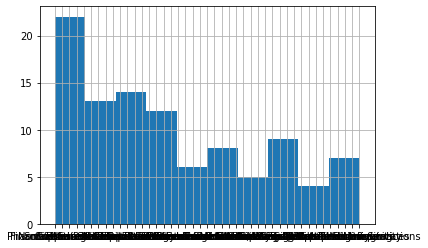

In [157]:
# Part III - unfortunately I did not have enough time to finish this part
most_represented = df_scrape['Industry'].value_counts().idxmax()
least_represented = df_scrape['Industry'].value_counts().idxmin()

print("Most represented: ", most_represented)
print("Least represented: ",least_represented)

print("Hist:", df_scrape['Industry'].hist())